# All Modules Functionality Workbook

This notebook demonstrates all steps of the workflow: fetching, transforming, training, inference, and simulation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Check local directory is 05-deployment-and-automation
!pwd

/Users/realmistic/Documents/GitHub/stock-markets-analytics-zoomcamp/05-deployment-and-automation


In [3]:
# workflow settings
FETCH_REPO = True
TRANSFORM_DATA = True
TRAIN_MODEL = True

# 1) Fetching data from API / Loading from a local storage

In [4]:
from scripts.data_repo import DataRepository

repo = DataRepository()

In [5]:
if FETCH_REPO:
  # Fetch All 3 datasets for all dates from APIs
  repo.fetch()
  # save data to a local dir
  repo.persist(data_dir='local_data/')
else:
  # OR Load from disk
  repo.load(data_dir='local_data/')  

  
# DEBUG: Separate fetching of the datasets (YFinance-Tickers, YFinance-Indexes, FRED-Macro)
# repo.fetch_tickers()
# repo.fetch_indexes()
# repo.fetch_macro()

Fetching Tickers info from YFinance
Going download data for this tickers: ['MSFT', 'AAPL', 'GOOG']


[*********************100%%**********************]  1 of 1 completed                                                | 0/74 [00:00<?, ?it/s]
[*********************100%%**********************]  1 of 1 completed                                        | 1/74 [00:01<02:07,  1.74s/it]
[*********************100%%**********************]  1 of 1 completed                                        | 2/74 [00:03<01:53,  1.58s/it]
[*********************100%%**********************]  1 of 1 completed                                        | 3/74 [00:04<01:40,  1.41s/it]
[*********************100%%**********************]  1 of 1 completed                                        | 4/74 [00:05<01:34,  1.35s/it]
[*********************100%%**********************]  1 of 1 completed                                        | 5/74 [00:06<01:30,  1.30s/it]
[*********************100%%**********************]  1 of 1 completed                                        | 6/74 [00:08<01:25,  1.26s/it]
[*******************

Fetching Indexes info from YFinance


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching Macro info from FRED (Pandas_datareader)


In [6]:
# NOT WORKING YET - need to move all data transformations to Transform

# # Test fetching data with a specific min_date
# min_date = '2024-06-01'
# print(f"\nFetching data from {min_date}:")
# repo.fetch(min_date=min_date)

# repo.ticker_df.Ticker.nunique()

In [7]:
repo.ticker_df.Date.agg({'min','max','count'})

count        654828
max      2024-07-16
min      1970-01-02
Name: Date, dtype: object

In [8]:
repo.ticker_df.Ticker.nunique()

74

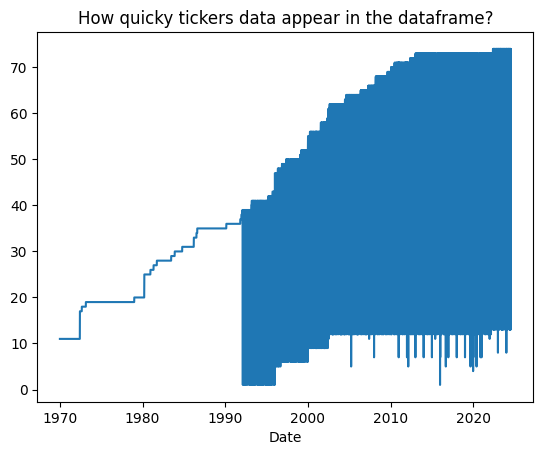

In [9]:
import matplotlib.pyplot as plt
repo.ticker_df.groupby('Date')['Open'].agg('count').plot()
plt.title('How quicky tickers data appear in the dataframe?')
plt.show()


In [10]:
repo.indexes_df.shape

(13753, 49)

In [11]:
repo.indexes_df.tail(1)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-16,1.006755,1.003438,1.020997,1.079802,1.113146,1.407069,0.987339,1.005627,1.003269,0.994768,...,0.958896,1.023088,1.020843,0.991242,1.048178,1.100467,1.123646,0.962615,0.998505,2.106389


In [12]:
repo.macro_df.tail(1)

,DGS1,DGS5,Date,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,FEDFUNDS,cpi_core_yoy,cpi_core_mom,DGS10
DATE,,,,,,,,,,,
2024-07-12,4.87,4.1,2024-07-12,2024-07-01,0.020675,0.005201,2024-07-01,5.33,0.032769,0.000648,4.18


# 2) Transform all input fields (data_repo dfs) to one dataframe

In [13]:
from scripts.transform import TransformData

transformed =  TransformData(repo = repo)

if TRANSFORM_DATA:
  transformed.transform()
  transformed.persist(data_dir='local_data/')
else:
  transformed.load(data_dir='local_data/')

LT.NS: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:26<00:00,  2.81it/s]


In [14]:
transformed.transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424100 entries, 3490 to 5473
Columns: 203 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), float64(128), int32(65), int64(5), object(2)
memory usage: 554.9+ MB


In [15]:
transformed.transformed_df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
5472,3630.000000,3667.699951,3612.699951,3649.350098,3649.350098,2001185.0,INDIA,LT.NS,2024,7,...,0.985969,1.017105,1.026932,1.001531,1.009670,0.998108,1.021833,0.848453,0.907210,1.839477
5473,3646.100098,3651.600098,3621.000000,3636.550049,3636.550049,2220477.0,INDIA,LT.NS,2024,7,...,0.958896,1.023088,1.020843,0.991242,1.048178,1.100467,1.123646,0.962615,0.998505,2.106389


In [16]:
# last 3 days of the data
transformed.transformed_df.tail(3)['Date']

5471   2024-07-11 00:00:00+00:00
5472   2024-07-12 00:00:00+00:00
5473   2024-07-16 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

# 3) Train the best model 
* Model : Random Forest(max_depth=17, n_estimators=200)

In [17]:
from scripts.train import TrainModel
import warnings

# Suppress all warnings (not recommended in production unless necessary)
warnings.filterwarnings("ignore")

trained = TrainModel(transformed=transformed)

if TRAIN_MODEL:
  trained.prepare_dataframe() # prepare dataframes
  trained.train_random_forest() # train the model
  trained.persist(data_dir='local_data/') # save the model to disk
else:
  trained.prepare_dataframe() # prepare dataframes (incl. for inference)
  trained.load(data_dir='local_data/')


Prepare the dataframe: define feature sets, add dummies, temporal split
length: X_train (288538, 281),  X_validation (67655, 281), X_test (67907, 281)
  X_train_valid = (356193, 281),  all combined: X_all (424100, 281)
Training the best model (RandomForest (max_depth=17, n_estimators=200))


In [18]:
# resulting df
trained.df_full.tail(2)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Ticker_UNH,Ticker_V,Ticker_VZ,Ticker_WFC,Ticker_WMT,Ticker_XOM,ticker_type_EU,ticker_type_INDIA,ticker_type_US,split
5472,3630.000000,3667.699951,3612.699951,3649.350098,3649.350098,2001185.0,INDIA,LT.NS,2024,7,...,0,0,0,0,0,0,0,1,0,test
5473,3646.100098,3651.600098,3621.000000,3636.550049,3636.550049,2220477.0,INDIA,LT.NS,2024,7,...,0,0,0,0,0,0,0,1,0,test


In [19]:
trained.model

RandomForestClassifier(max_depth=17, n_estimators=200, n_jobs=-1,
                       random_state=42)

# 4) Inference

In [20]:
prediction_name='pred_rf_best'
trained.make_inference(pred_name=prediction_name)

Making inference


In [21]:
trained.df_full

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Ticker_VZ,Ticker_WFC,Ticker_WMT,Ticker_XOM,ticker_type_EU,ticker_type_INDIA,ticker_type_US,split,pred_rf_best,pred_rf_best_rank
3490,58.687500,59.312500,56.000000,58.281250,36.000645,53228400.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.401436,43.0
3491,56.781250,58.562500,56.125000,56.312500,34.784534,54119000.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.493728,49.0
3492,55.562500,58.187500,54.687500,56.906250,35.151279,64059600.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.492964,48.0
3493,56.093750,56.937500,54.187500,55.000000,33.973801,54976600.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.570347,44.0
3494,54.312500,56.125000,53.656250,55.718750,34.417755,62013600.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.673414,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,3650.000000,3685.000000,3646.100098,3666.100098,3666.100098,2425176.0,INDIA,LT.NS,2024,7,...,0,0,0,0,0,1,0,test,0.433263,63.0
5470,3685.050049,3694.000000,3601.000000,3650.050049,3650.050049,2231438.0,INDIA,LT.NS,2024,7,...,0,0,0,0,0,1,0,test,0.450302,36.0
5471,3660.000000,3684.600098,3603.000000,3621.100098,3621.100098,2942924.0,INDIA,LT.NS,2024,7,...,0,0,0,0,0,1,0,test,0.460469,38.0
5472,3630.000000,3667.699951,3612.699951,3649.350098,3649.350098,2001185.0,INDIA,LT.NS,2024,7,...,0,0,0,0,0,1,0,test,0.466167,20.0


In [22]:
COLUMNS = ['Adj Close','Ticker','Date',prediction_name, prediction_name+'_rank']
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred_rf_best,pred_rf_best_rank
6103,28.680000,IBN,2024-07-02 00:00:00+00:00,0.527041,1.0
6298,405.450012,OR.PA,2024-07-03 00:00:00+00:00,0.539407,1.0
5463,1423.050049,BHARTIARTL.NS,2024-07-04 00:00:00+00:00,0.574748,1.0
11168,204.789993,JPM,2024-07-05 00:00:00+00:00,0.520846,1.0
6404,128.199997,NVDA,2024-07-08 00:00:00+00:00,0.507533,1.0
5776,61.290001,HDB,2024-07-09 00:00:00+00:00,0.504247,1.0
5777,60.360001,HDB,2024-07-10 00:00:00+00:00,0.503519,1.0
3756,1705.949951,AVGO,2024-07-11 00:00:00+00:00,0.519159,1.0
13079,69.239998,WMT,2024-07-12 00:00:00+00:00,0.507191,1.0
13140,205.119995,TXN,2024-07-16 00:00:00+00:00,0.560479,1.0


In [23]:
print(trained.df_full[trained.df_full[f'{prediction_name}_rank']<=2].sort_values(by="Date").tail(10)[COLUMNS])

         Adj Close Ticker                      Date  pred_rf_best  \
10238    40.634998     VZ 2024-07-09 00:00:00+00:00      0.498145   
5776     61.290001    HDB 2024-07-09 00:00:00+00:00      0.504247   
13749    62.830002     KO 2024-07-10 00:00:00+00:00      0.496987   
5777     60.360001    HDB 2024-07-10 00:00:00+00:00      0.503519   
11172   241.259995   AMAT 2024-07-11 00:00:00+00:00      0.504569   
3756   1705.949951   AVGO 2024-07-11 00:00:00+00:00      0.519159   
5047    253.970001    CRM 2024-07-12 00:00:00+00:00      0.501691   
13079    69.239998    WMT 2024-07-12 00:00:00+00:00      0.507191   
11174   103.120003    ABT 2024-07-16 00:00:00+00:00      0.548676   
13140   205.119995    TXN 2024-07-16 00:00:00+00:00      0.560479   

       pred_rf_best_rank  
10238                2.0  
5776                 1.0  
13749                2.0  
5777                 1.0  
11172                2.0  
3756                 1.0  
5047                 2.0  
13079                1.0

In [26]:
# Predictions for one Ticker by date - is it the last day's jump?
print(trained.df_full[trained.df_full['Ticker']=='ABT'].sort_values(by="Date").tail(10)[COLUMNS])

        Adj Close Ticker                      Date  pred_rf_best  \
11165  102.655380    ABT 2024-07-01 00:00:00+00:00      0.495604   
11166  102.655380    ABT 2024-07-02 00:00:00+00:00      0.484500   
11167  101.789978    ABT 2024-07-03 00:00:00+00:00      0.523146   
11168  103.471054    ABT 2024-07-05 00:00:00+00:00      0.483538   
11169  101.581085    ABT 2024-07-08 00:00:00+00:00      0.485268   
11170  101.103615    ABT 2024-07-09 00:00:00+00:00      0.452080   
11171  102.506180    ABT 2024-07-10 00:00:00+00:00      0.430259   
11172  103.630211    ABT 2024-07-11 00:00:00+00:00      0.415110   
11173  103.670006    ABT 2024-07-12 00:00:00+00:00      0.446050   
11174  103.120003    ABT 2024-07-16 00:00:00+00:00      0.548676   

       pred_rf_best_rank  
11165               36.0  
11166               37.0  
11167                6.0  
11168               41.0  
11169               10.0  
11170               52.0  
11171               60.0  
11172               70.0  
11173   

In [25]:
print(trained.df_full[trained.df_full['Ticker']=='TMO'].sort_values(by="Date").tail(10)[COLUMNS])

        Adj Close Ticker                      Date  pred_rf_best  \
11165  541.719971    TMO 2024-07-01 00:00:00+00:00      0.504469   
11166  533.929993    TMO 2024-07-02 00:00:00+00:00      0.498489   
11167  535.609985    TMO 2024-07-03 00:00:00+00:00      0.526853   
11168  540.099976    TMO 2024-07-05 00:00:00+00:00      0.493556   
11169  536.289978    TMO 2024-07-08 00:00:00+00:00      0.459134   
11170  531.859985    TMO 2024-07-09 00:00:00+00:00      0.459764   
11171  536.869995    TMO 2024-07-10 00:00:00+00:00      0.461305   
11172  542.690002    TMO 2024-07-11 00:00:00+00:00      0.445264   
11173  548.090027    TMO 2024-07-12 00:00:00+00:00      0.407863   
11174  551.734985    TMO 2024-07-16 00:00:00+00:00      0.517453   

       pred_rf_best_rank  
11165               25.0  
11166               23.0  
11167                5.0  
11168               24.0  
11169               38.0  
11170               38.0  
11171               23.0  
11172               52.0  
11173   